<a href="https://colab.research.google.com/github/B21-CAP0366/meater-ml/blob/main/meater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meater

Steps:
1. Acquire data
1. Data preprocessing
1. Make the model
1. Train the model
1. Plot the model

## Acquire Data

Acquire data from: https://www.kaggle.com/crowww/meat-quality-assessment-based-on-deep-learning

Steps:
1. Run cells below
1. Upload `kaggle.json` to colab
1. Done. It will be downloaded to your workspace automatically

In [1]:
from google.colab import files


print("Upload your kaggle.json")
kaggle_file = files.upload()

# Change file permission
! chmod 600 kaggle.json 
# Check or make kaggle folder
! (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle)
# Move kaggle.json to kaggle folder
! mv kaggle.json ~/.kaggle/ && echo 'Done'

Upload your kaggle.json


Saving kaggle.json to kaggle.json
Done


In [2]:
# Download dataset from kaggle
! kaggle datasets download crowww/meat-quality-assessment-based-on-deep-learning

import zipfile


file_name = 'meat-quality-assessment-based-on-deep-learning.zip'
# Extract dataset zip file
with zipfile.ZipFile(file_name) as zip_file:
    zip_file.extractall('./meat-dataset/')

print('Done')

 97% 263M/270M [00:06<00:00, 57.0MB/s]
100% 270M/270M [00:06<00:00, 44.6MB/s]
Done


## Data Preprocessing

Steps:
1. Look at some sample pictures
1. Make generator

### Look at the data

In [28]:
import os
import cv2 as cv


base_dir = os.path.join('meat-dataset')
fresh_meat_dir = os.path.join(base_dir, 'Fresh')
spoiled_meat_dir = os.path.join(base_dir, 'Spoiled')

# List file names in each folder
fresh_meat_names = os.listdir(fresh_meat_dir)
spoiled_meat_names = os.listdir(spoiled_meat_dir)

sample_img = cv.imread(os.path.join(fresh_meat_dir, fresh_meat_names[0]))
print('Fresh meat: {}'.format(len(fresh_meat_names)))
print('Shape: {}'.format(sample_img.shape))
print(fresh_meat_names[:5])

sample_img = cv.imread(os.path.join(spoiled_meat_dir, spoiled_meat_names[0]))
print('\nSpoiled meat: {}'.format(len(spoiled_meat_names)))
print('Shape: {}'.format(sample_img.shape))
print(spoiled_meat_names[:5])

Fresh meat: 948
Shape: (720, 1280, 3)
['test_20171016_210921D.jpg', 'test_20171017_105121D.jpg', 'test_20171017_120321D.jpg', 'test_20171017_014321D.jpg', 'test_20171017_012321D.jpg']

Spoiled meat: 948
Shape: (720, 1280, 3)
['test_20171019_024121D.jpg', 'test_20171018_100721D.jpg', 'test_20171018_235921D.jpg', 'test_20171017_200921D.jpg', 'test_20171017_225721D.jpg']


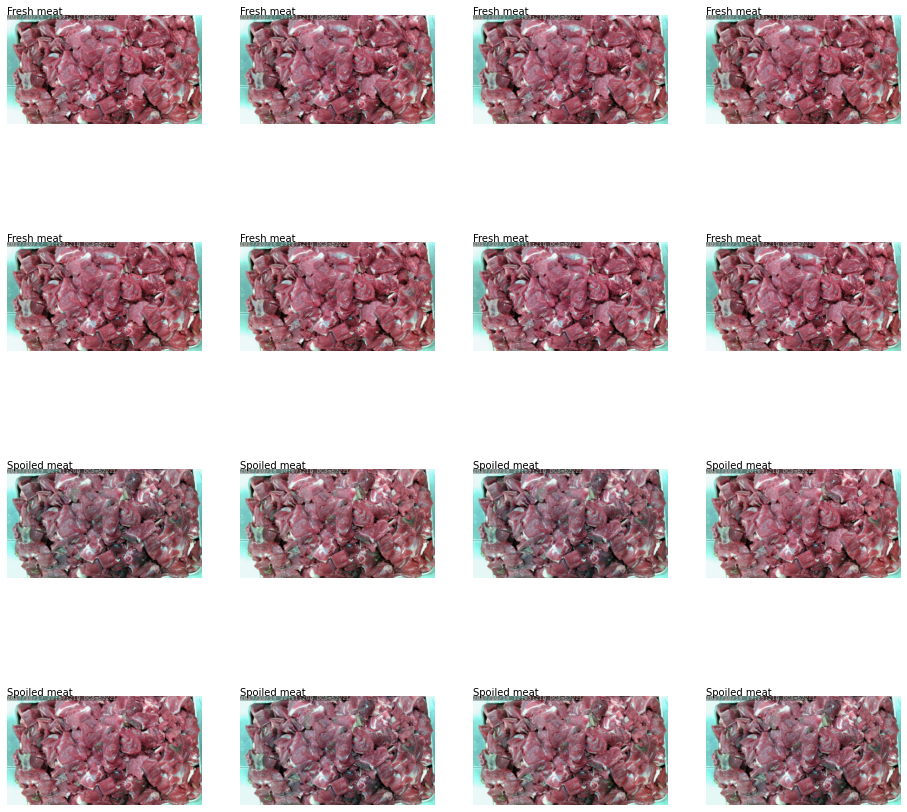

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


nrows = 4
ncols = 4

# Set up figure and size it to 4*4
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index = 8

# Get first 8 pictures in each folder
fresh_meat_pic = [os.path.join(fresh_meat_dir, fname) for fname in fresh_meat_names[:pic_index]]
spoiled_meat_pic = [os.path.join(spoiled_meat_dir, fname) for fname in spoiled_meat_names[:pic_index]]

for i, img_path in enumerate(fresh_meat_pic + spoiled_meat_pic):
    # Set text
    if i < pic_index:
        text = 'Fresh meat'
    else:
        text = 'Spoiled meat'
    
    # Setup subplot
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')  # Turn off subplot axis
    sp.text(1, 1, text)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()  # Show images

### Make generator

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Make image data generator
train_datagen = ImageDataGenerator(
    rescale=1/255.0,        # Rescale the image
    rotation_range=45,      # Randomly rotating image 0-45 deg 
    width_shift_range=0.2,  # Move image around in its frame
    height_shift_range=0.2, # Move image around in its frame
    shear_range=0.2,        # Shear the image randomly up to 20%
    zoom_range=0.2,         # Zoom the image randomly up to 20%
    horizontal_flip=True,   # Flip horizontally
    vertical_flip=True,     # Flip vertically
    fill_mode='nearest',    # Fill the pixel
    validation_split=0.2    # Split 80% training 20% validation
)

# Make train generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    subset='training'
)

# Make validation generator
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)

Found 1518 images belonging to 2 classes.
Found 378 images belonging to 2 classes.
